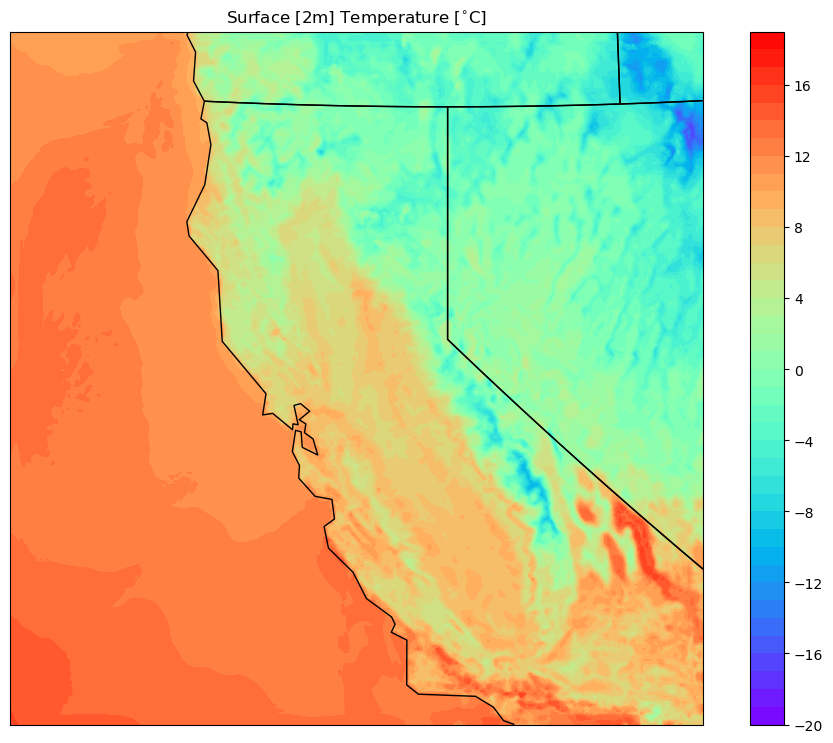

In [81]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import get_cmap
from wrf import getvar, interplevel, to_np, get_basemap, latlon_coords
import cartopy as cp

# Open the NetCDF file
ncfile = Dataset("/home/wto/WRF/WRFV4.5/test/em_real/wrfout_d01_2025-01-01_05:00:00")
# Extract the pressure
T2 = getvar(ncfile, "T2")

# Get the lat/lon coordinates
lats, lons = latlon_coords(T2)

# Get the basemap object
bm = get_basemap(T2)
# Convert the lat/lon coordinates to x/y coordinates in the projection space
x, y = bm(to_np(lons), to_np(lats))

# Create the figure
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
# Add Coastlines and State Borders from cartopy.feature
# Add the geographic boundaries
bm.drawcoastlines(linewidth=1)
bm.drawstates(linewidth=1)

# Add the wind speed contours
levels = np.arange(-20,20,1)
p_map = bm.contourf(x, y, to_np(T2)-273, levels=levels,
                            cmap=get_cmap("rainbow"))
plt.colorbar(p_map, ax=ax, orientation="vertical")
plt.title("Surface [2m] Temperature [$^{\circ}$C]")
plt.show()

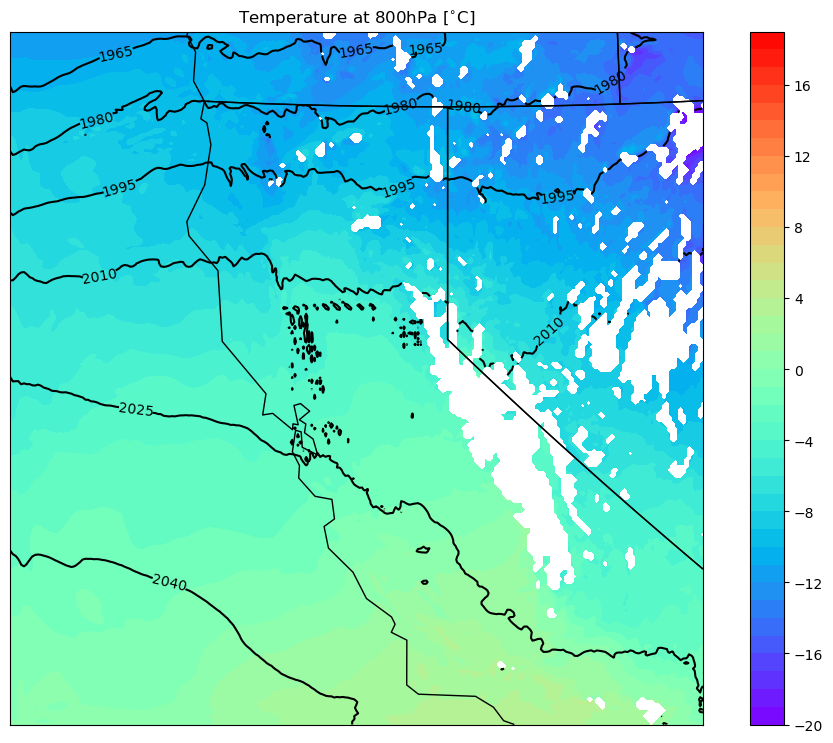

In [2]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import get_cmap
from wrf import getvar, interplevel, to_np, get_basemap, latlon_coords
import cartopy as cp

# Open the NetCDF file
ncfile = Dataset("/home/wto/WRF/WRFV4.5/test/em_real/wrfout_d01_2025-01-01_05:00:00")
# Extract the pressure
T = getvar(ncfile, "T")
z = getvar(ncfile, "z", units="m")
p = getvar(ncfile, "pressure")
T_800 = interplevel(T, p, 800)  
z_800 = interplevel(z, p, 800)  

# Get the basemap object
bm = get_basemap(T_800)
# Get the lat/lon coordinates
lats, lons = latlon_coords(T_800)
# Convert the lat/lon coordinates to x/y coordinates in the projection space
x, y = bm(to_np(lons), to_np(lats))

# Create the figure
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
# Add Coastlines and State Borders from cartopy.feature
# Add the geographic boundaries
bm.drawcoastlines(linewidth=1)
bm.drawstates(linewidth=1)

contours = bm.contour(x, y, to_np(z_800), colors="black")
plt.clabel(contours, inline=1, fontsize=10, fmt="%i")

# Add the wind speed contours
levels = np.arange(-20,20,1)
T_800_map = bm.contourf(x, y, to_np(T_800), levels=levels,
                            cmap=get_cmap("rainbow"))
plt.colorbar(T_800_map, ax=ax, orientation="vertical")
plt.title("Temperature at 800hPa [$^{\circ}$C]")
plt.show()

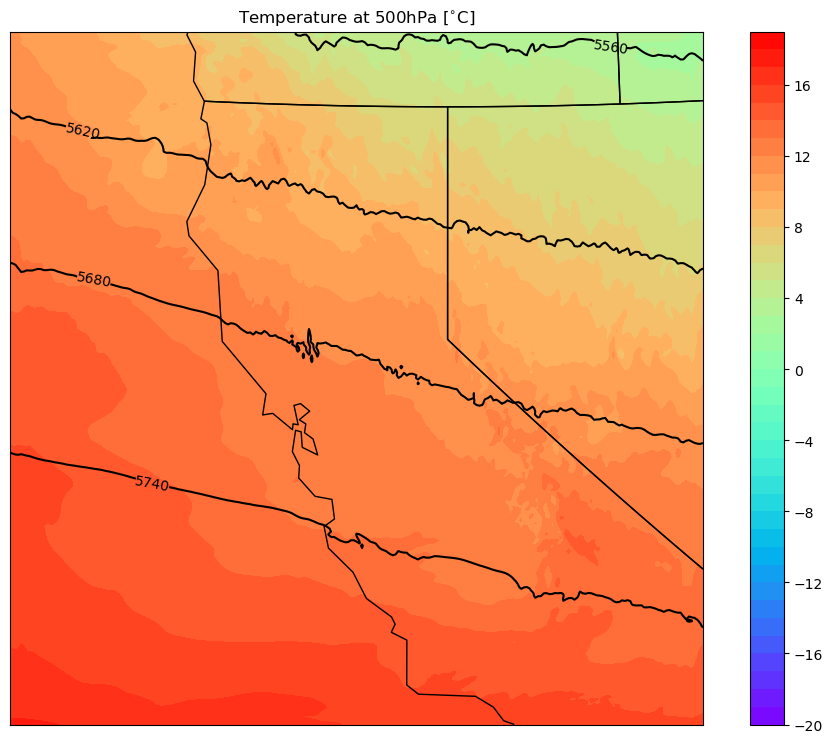

In [93]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import get_cmap
from wrf import getvar, interplevel, to_np, get_basemap, latlon_coords
import cartopy as cp

# Open the NetCDF file
ncfile = Dataset("/home/wto/WRF/WRFV4.5/test/em_real/wrfout_d01_2025-01-01_05:00:00")
# Extract the pressure
T = getvar(ncfile, "T")
z = getvar(ncfile, "z", units="m")
p = getvar(ncfile, "pressure")
T_500 = interplevel(T, p, 500)  
z_500 = interplevel(z, p, 500)  

# Get the basemap object
bm = get_basemap(T_500)
# Get the lat/lon coordinates
lats, lons = latlon_coords(T_500)
# Convert the lat/lon coordinates to x/y coordinates in the projection space
x, y = bm(to_np(lons), to_np(lats))

# Create the figure
fig = plt.figure(figsize=(12,9))
ax = plt.axes()
# Add Coastlines and State Borders from cartopy.feature
# Add the geographic boundaries
bm.drawcoastlines(linewidth=1)
bm.drawstates(linewidth=1)

levels = np.arange(5200., 6000., 60.)
contours = bm.contour(x, y, to_np(z_500), levels=levels, colors="black")
plt.clabel(contours, inline=1, fontsize=10, fmt="%i")

# Add the wind speed contours
levels = np.arange(-20,20,1)
T_500_map = bm.contourf(x, y, to_np(T_500), levels=levels,
                            cmap=get_cmap("rainbow"))
plt.colorbar(T_500_map, ax=ax, orientation="vertical")
plt.title("Temperature at 500hPa [$^{\circ}$C]")
plt.show()